# Desafio 1 Grupo 7

## Limpieza de datos

Integrantes:



> Albano Remonda

> Jesica Milloch

> Sebastian Salvarezza

> Ezequiel Tokman

> Nicolas Ramos


**Introducción**

El objetivo del desafio 1  que constituye la primer parte del proyecto es poner en práctica un proceso de Data Wrangling sobre el Dataset provisto por la empresa inmobiliaria Properatti. Posteriormente, en la segunda etapa (desafío 2) el dataset obtenido será el dato de entrada de un modelo de regresión lineal con la finalidad de calcular el valor de nuevas observaciones.

La metodología de trabajo aplicada se describe a continuación:

A) Análisis exploratorio de los datos

B) Corrección y selección de los datos 

C) Creación de nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

D) Eliminación de registros irrelevantes para el modelo predictivo aplicado al dataset en cuestión.

In [336]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import io

In [337]:
data_location = "../Data/properatti.csv"
data = pd.read_csv(data_location)

<AxesSubplot:>

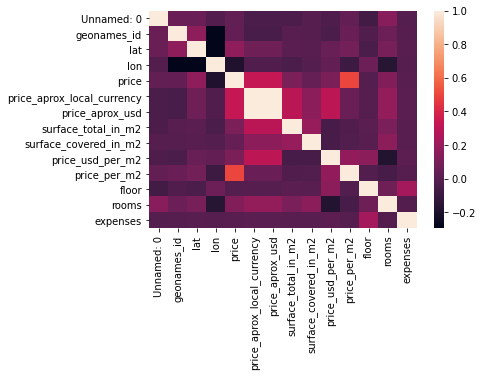

In [338]:
#vemos la correlación de las variables en el dataset sin procesar
sns.heatmap(data.corr())

**A) ANÁLISIS EXPLORATORIO**

In [339]:
# También traemos las últimas 5 filas.
data.tail(5)

Unnamed: 0 operation property_type       place_name  \
121215      121215      sell     apartment         Belgrano   
121216      121216      sell         house           Beccar   
121217      121217      sell     apartment    Villa Urquiza   
121218      121218      sell     apartment      Plaza Colón   
121219      121219      sell     apartment  Capital Federal   

                                  place_with_parent_names country_name  \
121215               |Argentina|Capital Federal|Belgrano|    Argentina   
121216  |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...    Argentina   
121217          |Argentina|Capital Federal|Villa Urquiza|    Argentina   
121218  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
121219                        |Argentina|Capital Federal|    Argentina   

                          state_name  geonames_id  \
121215               Capital Federal    3436077.0   
121216      Bs.As. G.B.A. Zona Norte    3436080.0   
121217               Capital Federal    3433775.0   
121218  Buenos Aires Costa Atlántica          NaN   
121219               Capital Federal    3433955.0   

                              lat-lon        lat  ...  surface_covered_in_m2  \
121215                            NaN        NaN  ...                   93.0   
121216                            NaN        NaN  ...                  360.0   
121217  -34.5706388726,-58.4755963355 -34.570639  ...                   39.0   
121218                            NaN        NaN  ...                   48.0   
121219                            NaN        NaN  ...                   77.0   

        price_usd_per_m2 price_per_m2  floor  rooms  expenses  \
121215       7699.115044  9354.838710    NaN    NaN   10000.0   
121216       1383.333333  1383.333333    NaN    NaN       NaN   
121217       2858.695652  3371.794872    NaN    NaN       NaN   
121218       1997.916667  1997.916667    NaN    NaN       NaN   
121219       1675.324675  1675.324675    NaN    NaN    3500.0   

                                            properati_url  \
121215  http://www.properati.com.ar/1cja2_venta_depart...   
121216  http://www.properati.com.ar/1cja6_venta_casa_b...   
121217  http://www.properati.com.ar/1cja7_venta_depart...   
121218  http://www.properati.com.ar/1cja8_venta_depart...   
121219  http://www.properati.com.ar/1cjaa_venta_depart...   

                                              description  \
121215  TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...   
121216  Excelente e impecable casa en Venta en Las Lom...   
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...   
121218  2 Amb al contrafrente,  luminoso. El departame...   
121219  Departamento de 77 m2 apto profesional. Edific...   

                                                    title  \
121215         Torre Forum Alcorta- Impecable 3 ambientes   
121216  Ruca Inmuebles | Venta | Lomas de San Isidro |...   
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...   
121218  2 amb. C/ dep. de servicio al contrafrente| Re...   
121219         Departamento apto profesional en el Centro   

                                          image_thumbnail  
121215  https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...  
121216  https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...  
121217  https://thumbs4.properati.com/9/YAe_-2gRVykADP...  
121218  https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...  
121219  https://thumbs4.properati.com/8/mNEsnQWqB7joBF...  

[5 rows x 26 columns]

In [340]:
#Observamos de que tipo son las variables del Dataset
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [341]:
#Aquí vamos a verificar el tamaño de la base-> la misma es entre pequeña y mediana.
data.shape

(121220, 26)

In [342]:
#calculamos el porcentaje de valores  nulos de cada columna y la cantidad de nulos.
cant_null= data.isnull().sum()
cant_porc_null = ((data.isnull().sum() *100)/ data.shape[0])
null_result = pd.DataFrame({"% valores nulos":cant_porc_null.round(), "total nulos":cant_null})
null_result

% valores nulos  total nulos
Unnamed: 0                              0.0            0
operation                               0.0            0
property_type                           0.0            0
place_name                              0.0           23
place_with_parent_names                 0.0            0
country_name                            0.0            0
state_name                              0.0            0
geonames_id                            15.0        18717
lat-lon                                43.0        51550
lat                                    43.0        51550
lon                                    43.0        51550
price                                  17.0        20410
currency                               17.0        20411
price_aprox_local_currency             17.0        20410
price_aprox_usd                        17.0        20410
surface_total_in_m2                    32.0        39328
surface_covered_in_m2                  16.0        19907
price_usd_per_m2                       43.0        52603
price_per_m2                           28.0        33562
floor                                  93.0       113321
rooms                                  61.0        73830
expenses                               88.0       106958
properati_url                           0.0            0
description                             0.0            2
title                                   0.0            0
image_thumbnail                         3.0         3112

In [343]:
#Aquí podemos ver que tenemos apartamentos, casas, PH y locales comerciales.
data.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [344]:
import plotly.express as px
fig = px.pie(data, values='Unnamed: 0', names='property_type', title='Distribución de tipos de propiedad',color_discrete_sequence=px.colors.sequential.Blues_r)
fig.show()

In [345]:
#tipos de cambio del valor de la propiedad (USD=Dólares; ARS=Pesos Argentinos; PEN=Soles Peruanos; UYU=PEsos Uruguayos)
data.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [346]:
#Aquí se puede ver que la columna place_with_parent_names es una combinación de las columnas state_name, country_name y place_name
#pero en algunos valores contienen un cuarto valor.
data.place_with_parent_names.value_counts()

|Argentina|Santa Fe|Rosario|                                                     8504
|Argentina|Córdoba|Córdoba|                                                      6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                           6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                              3315
|Argentina|Capital Federal|Belgrano|                                             2992
                                                                                 ... 
|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Echeverría|Country Golf El Sosiego|       1
|Argentina|Mendoza|Capilla del Rosario|                                             1
|Argentina|Buenos Aires Interior|Brandsen|Jeppener|                                 1
|Argentina|Buenos Aires Interior|Brandsen|Haras del Sur II|                         1
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Barrio Cerrado "Las Araucarias"|          1
Name: place_with_parent_names, Length: 1164, dtype: in

In [347]:
#La variable state_name son los "estados/provincias"
data.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [348]:
import plotly.express as px
df_valc=data['state_name'].value_counts()
fig=px.bar(df_valc, y='state_name',title="Cantidad de publicaciones por provincia")
fig.show()

In [349]:
#Aquí podemos ver que tenemos nombres de Ciudades/Pueblos/localidades urbanas.
data.place_name.value_counts()

Córdoba                      9254
Rosario                      8504
Mar del Plata                6534
Tigre                        3324
Nordelta                     3315
                             ... 
Perú                            1
Barrio cerrado La Cascada       1
El Canton Barrio Norte          1
Gral San Martin                 1
Rincon                          1
Name: place_name, Length: 1060, dtype: int64

In [350]:
#Esta columna refiere al país
data.country_name.unique()

array(['Argentina'], dtype=object)

**EN PRINCIPIO OBSERVAMOS QUE LOS DATOS SE PUEDEN SUBDIVIDIR EN LOS SIGUIENTES GRUPOS:**

**1-UBICACIÓN GEOGRÁFICA**

1-A NOMBRE GEOGRÁFICO

1-B COORDENADAS 

**2-PRECIO**

2-A POR METRO CUADRADO

2-B TOTAL

**3-SUPERFICIE**

**4-TIPO DE PROPIEDAD**

**5-CANTIDAD DE HABITACIONES**

**6-DESCRIPCIÓN**

**7-OTROS**


**PARA CADA CONJUNTO DE VARIABLES SE PLANTEA LO SIGUIENTE:**

1-UBICACIÓN GEOGRÁFICA  
1-A POR NOMBRE 

La variable  country_name siempre toma el valor: argentina, por lo tanto es irrelevante y puede ser eliminada del dataset.
La variable place_with_parent_names se compone de las otras tres de tipo nombre geográfico: country_name, place_name y state_name, además se observa un cuarto dato que vamos  separar para analizar en detalle.


1-B POR COORDENADAS

Los datos faltantes de la variable lot-lat con 43 % nulos pueden ser rellenados con datos de extraídos de la base de 
datos geonames utilizando los valores de la variable geonames_id con menor cantidad de nulos (15 %), ya que las variables 
lat y long suman la misma cantidad de nulos y por lo tanto podrían ser eliminadas.

2-PRECIO 

A-POR M2

Tenemos dos colúmnas: price_per_m2 con 28% nulos y price_usd_per_m2 con 43 %. Debemos investigar de donde se obtuvieron estos valores en el dataset original.

También, podríamos extraer información creando un patrón regex y buscar más información en las columnas title y describe.

B-TOTAL

Evaluaremos las columnas que contienen datos sobre el  precio total de cada propiedad: price, currency, price_aprox_local_currency y price_aprox_usd. El nombre nos estaría indicando que price contiene el precio real y las otras un aproximado, sin embargo no sabemos si price es una columna limpia o mezcla valores de las otras dos o incluso valores cotizados en otras monedas, si es así la eliminamos  y nos quedamos solo con las columnas con datos de precios cotizados en la misma moneda (local y usd).




3-SUPERFICIE

Hay dos variables surface_total_in_m2 y surface_covered_in_m2.
El porcentaje de valores nulos en superficie total es muy elevado, podemos buscar datos en la variable  description y  title mediante regex, además deberíamos revisar si los valores son coherentes, es decir si la superficie cubierta no supera a la total en todos los índices. Tambien evaluar si ambas colúmnas se pueden imputar mutuamente. Revisar si hay valores outliers.

4-TIPO DE PROPIEDAD 

Agrupamos la variable por categorías con el método value_counts, son solo 4, esta variable no tiene nulos. solo se dummyfica al final del proyecto.

5-CANTIDAD DE HABITACIONES

La variable rooms tiene 61% de valores nulos y solo podemos extraer información adicional desde las variables title y descripción.
Hacemos regex en las dos y observamos los datos arrojados y la coherencia de los mismos. 

6- DESCRIPCIÓN Y TÍTULO

Características como " a estrenar" "cochera" y "pileta" se pueden buscar con regex y aportaran valor al dataset.

7-OTROS

Las variables Unnamed y operation no son relevantes.

Las variables floor y expensas tienen altísimo porcentaje de nulos.

Las variables properati_url e image_thumbnail no aportan valor al modelo predictivo.

Por lo arriba mencionado procedemos a eliminar estas columnas.


**B) CORRECIÓN Y SELECCIÓN DE LOS DATOS**

**1.A - UBICACIÓN POR NOMBRE**

In [351]:
#spliteamos la variable place_with_parent_names y separamos las palabras por el separador "|" asi obtenemos el cuarto dato que corresponde al barrio
place_total = data.place_with_parent_names
barrio = place_total.str.split("|",expand=True)
barrio.drop([0,1,3,2,5,6],axis=1,inplace=True)
barrio.rename({4:"barrio1"},axis=1)

barrio1
0                  
1                  
2                  
3                  
4            Centro
...             ...
121215             
121216       Beccar
121217             
121218  Plaza Colón
121219         None

[121220 rows x 1 columns]

In [352]:
print(barrio.value_counts())
print("......................")
print(barrio.isnull().sum())

4              
                   76023
Nordelta            3863
La Plata            1767
Olivos              1590
Lomas de Zamora     1253
                   ...  
Faro Norte             1
Elvira                 1
El Zorzal              1
El Viejo Vivero        1
Jeppener               1
Length: 568, dtype: int64
......................
4    4780
dtype: int64


In [353]:
#vemos que hay 76023.00 campos vacios y 4780 campos nulos, esta columna es interesante porque da información de los barrios pero 
#tiene muchos campos nulos y vacíos. Por el momento decidimos no desagregarla.

In [354]:
#Mediante el análisis de la variable "place_name" nos percatamos que los casos faltantes, eran aquellos que "place_with_parent_names" tenían a Tigre con dos líneas verticales a continuación. Por lo que se resolvió reemplazar esos valores de "place_name" por la palabra "Tigre"
mask_place_name = data[data['place_with_parent_names'].str.contains("|Tigre||",regex=False)]
mask_place_name.head ()

Unnamed: 0 operation property_type place_name  \
6489         6489      sell         house        NaN   
10201       10201      sell         house        NaN   
11451       11451      sell         house        NaN   
14839       14839      sell         house        NaN   
18622       18622      sell         house        NaN   

                           place_with_parent_names country_name  \
6489   |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
10201  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
11451  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
14839  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
18622  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   

                     state_name  geonames_id                        lat-lon  \
6489   Bs.As. G.B.A. Zona Norte          NaN    -34.4008968545,-58.63809847   
10201  Bs.As. G.B.A. Zona Norte          NaN          -34.400704,-58.638067   
11451  Bs.As. G.B.A. Zona Norte          NaN  -34.4026880384,-58.6262613379   
14839  Bs.As. G.B.A. Zona Norte          NaN  -34.4007994779,-58.6381735719   
18622  Bs.As. G.B.A. Zona Norte          NaN  -34.4032781195,-58.6263503945   

             lat  ...  surface_covered_in_m2  price_usd_per_m2 price_per_m2  \
6489  -34.400897  ...                  240.0       2708.333333  2708.333333   
10201 -34.400704  ...                  300.0               NaN  1783.333333   
11451 -34.402688  ...                  270.0        253.456221  2037.037037   
14839 -34.400799  ...                  200.0       2000.000000  2400.000000   
18622 -34.403278  ...                  340.0       3814.705882  3814.705882   

       floor  rooms  expenses  \
6489     NaN    NaN       NaN   
10201    NaN    5.0       NaN   
11451    NaN    NaN       NaN   
14839    NaN    NaN       NaN   
18622    NaN    NaN       NaN   

                                           properati_url  \
6489   http://www.properati.com.ar/15ui7_venta_casa_t...   
10201  http://www.properati.com.ar/166p5_venta_casa_t...   
11451  http://www.properati.com.ar/16bpd_venta_casa_t...   
14839  http://www.properati.com.ar/16tal_venta_casa_b...   
18622  http://www.properati.com.ar/177ee_venta_casa_t...   

                                             description  \
6489   Espectacular casa moderna de una planta, con a...   
10201  Corredor Responsable: SABRINA COCCONI - CSI 62...   
11451  MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...   
14839  Muy linda casa de estilo clásico.-Planta baja;...   
18622   Casa con increible vista al lago con playa de...   

                                                   title  \
6489               Venta de casa en Santa María de Tigre   
10201  VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...   
11451                     SANTA MARIA DE TIGRE IMPECABLE   
14839              Venta de casa en Santa María de Tigre   
18622  Casa con increible vista al lago con playa y m...   

                                         image_thumbnail  
6489   https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...  
10201  https://thumbs4.properati.com/1/FABpKIJMaoAO3t...  
11451  https://thumbs4.properati.com/5/fwH9L71hW2rW7V...  
14839  https://thumbs4.properati.com/1/3ZbPSffTY38y7v...  
18622  https://thumbs4.properati.com/0/52JCH1PKYCOMe6...  

[5 rows x 26 columns]

In [355]:
#remplazamos los nulos de la columna place_name por la palabra tigre, ya que podemos ver en la colúmna place_with_parent_names que es el dato faltante 
fill_value = "Tigre"
data_place_name_complete = data.place_name.fillna(fill_value,inplace = True)

In [356]:
###comprobamos que se haya realizado el reemplazo
data.place_name.isnull().sum()
data.loc[59069, "place_name"]

'Tigre'

**1.B - UBICACIÓN POR COORDENADAS**

In [357]:
data_location_2 = "../Data/geonames-all-cities-with-a-population-1000.csv"
geo_lonlat= pd.read_csv(data_location_2,sep=';')

In [358]:
# Bajamos el dataset geonames de https://public.opendatasoft.com/explore/dataset/geonames-all-cities-with-a-population-1000

# Como el dataset contiene las longitudes y latitudes en una sola columna llamada coordinates, la separamos
geo_coordinates = geo_lonlat.loc[:,['Coordinates']]
geo_lon_lat = geo_coordinates['Coordinates'].str.split(',', expand=True)

# Cambiamos el nombre de la columna Geoname ID del dataset geonames por geonames_id
geo_GeonamesID=geo_lonlat.loc[:,['Geoname ID']]
geo_GeonamesID['geonames_id']=geo_GeonamesID['Geoname ID']
geo_GeonamesID=geo_GeonamesID.loc[:,'geonames_id']

# Aplicamos el método concat para unir 'geonames_id' con las longitudes y latitudes del dataset geonames
df_geonamesid_lat_lon = pd.concat([geo_GeonamesID,geo_lon_lat], axis=1)

# Reenombramos las columnas del nuevo dataframe
df_geonamesid_lat_lon = df_geonamesid_lat_lon.rename({0:'lat',1:'lon'}, axis=1)

# Aplicamos el método merge para obtener en un solo dataframe las coordenadas de data y las de geodataframe
df_geonamesid_lat_lon  = pd.merge(data, df_geonamesid_lat_lon , on="geonames_id", how='left')
df_geonamesid_lat_lon=df_geonamesid_lat_lon.loc[:,['geonames_id','lat_x','lon_x','lat_y','lon_y']]

# Completamos los valores faltantes de las longitudes y latitudes del dataframe data por las de geonames
df_geonamesid_lat_lon.lat_x.fillna(df_geonamesid_lat_lon.lat_y, inplace=True)
df_geonamesid_lat_lon.lon_x.fillna(df_geonamesid_lat_lon.lon_y, inplace=True)

# Reemplazamos las columnas de longitudes y latitudes imputadas en las columnas de data
data['lat'] = df_geonamesid_lat_lon['lat_x']
data['lon'] = df_geonamesid_lat_lon['lon_x']

# Verificamos una reducción en los valores faltantes en las columnas lat y lon del dataframe data.
#Se pasó de 51550 a 41583 valores faltantes.
#Si hubiéramos utilizado una dataframe con mayor cantidad de geonames id, la limpieza huebiera sido mayor
#resultando una menor cantidad de nulos finalizada la limpieza
data.lat.isnull().sum()
data.lon.isnull().sum()

41583

In [359]:
# Casos que tienen ID_Name pero no tienen latidud ni longitud en todo el dataset 
data.loc[(~data['geonames_id'].isnull())&(data['lat'].isnull()),['geonames_id','lat','lon']].head(999999)

geonames_id  lat  lon
13        3430234.0  NaN  NaN
14        3430234.0  NaN  NaN
42        3429979.0  NaN  NaN
49        3434130.0  NaN  NaN
62        3436042.0  NaN  NaN
...             ...  ...  ...
121212    3436508.0  NaN  NaN
121213    3430813.0  NaN  NaN
121214    3428983.0  NaN  NaN
121216    3436080.0  NaN  NaN
121219    3433955.0  NaN  NaN

[33398 rows x 3 columns]

**2.A - PRECIO POR M2**

In [360]:
data.price_usd_per_m2.describe()

count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

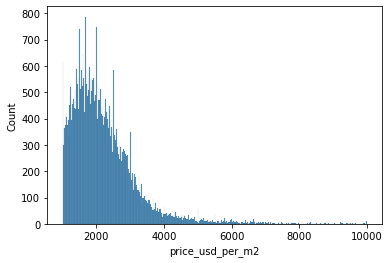

In [361]:
sns.histplot(data.price_usd_per_m2, kde = False, stat = 'count', 
             binrange=(1000,10000), bins = 500,
             line_kws={'linewidth':5});

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Density'>

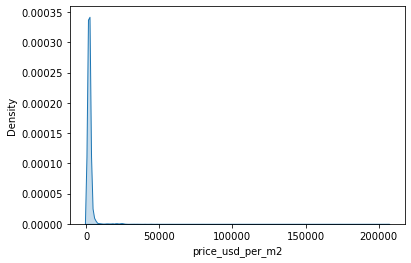

In [362]:
sns.kdeplot(data["price_usd_per_m2"], shade=True)

In [363]:
#veamos que % de nulos  obtenemos al realizar la siguiente operación:
price_m2_calculated = data.price_aprox_usd/data.surface_total_in_m2
print((price_m2_calculated.isnull().sum()*100/data.shape[0]).round())
#esto evidencia que los datos de la columna price_usd_per_m2 fue generada de esta forma y no nos suma nada

43.0


In [364]:
#veamos que % de nulos  obtenemos al realizar la siguiente operación:
price_m2_calculated_1 = data.price_aprox_usd/data.surface_covered_in_m2
print((price_m2_calculated_1.isnull().sum()*100/data.shape[0]).round())
#esto evidencia que los datos de la columna price_per_m2 fue generada de esta forma

28.0


In [365]:
#concluimos que el precio por metro cuadrado en dólares es una variable crítica.
#Tiene una cantidad de valores nulos muy elevada por eso intentaremos imputar valores
#¿De qué manera? vamos a analizar las variables que la originan: price_aprox_usd/surface_total_in_m2 y vemos que obtenemos

**2.B - PRECIO TOTAL**

In [366]:
#verificamos si los valores de columnas price y price_aprox_usd son iguales 
price0 = data.price
price1 = data.price_aprox_usd
new = price0 == price1
new.value_counts()

True     87588
False    33632
dtype: int64

In [367]:
#vamos a ver rapidamente con el metodo head si encontramos false en los primeros 100
new.head(100)

0      True
1      True
2      True
3      True
4      True
      ...  
95     True
96     True
97    False
98     True
99    False
Length: 100, dtype: bool

In [368]:
# vemos que en el índice  97 y 99 la condición es falsa, veamos los valores en este índice
print(data.loc[97,["price","price_aprox_local_currency","price_aprox_usd","currency"]])
print(data.loc[99,["price","price_aprox_local_currency","price_aprox_usd","currency"]])
print(data.loc[96,["price","price_aprox_local_currency","price_aprox_usd","currency"]])
#demostramos que price es la combinación de los  datos de las columnas price_aprox_local_currency y price_aprox_usd. por eso decidimos eliminarla 

price                          1.4238e+06
price_aprox_local_currency    1.40895e+06
price_aprox_usd                   79851.9
currency                              ARS
Name: 97, dtype: object
price                          850000
price_aprox_local_currency     841133
price_aprox_usd               47671.1
currency                          ARS
Name: 99, dtype: object
price                          54000
price_aprox_local_currency    952803
price_aprox_usd                54000
currency                         USD
Name: 96, dtype: object


In [369]:
price2 = data.price_aprox_local_currency.isnull()
price3 = data.price_aprox_usd.isnull()
new = price2 == price3
print(new.sum())
#asi podemos ver que de los valores nulos y no nulos las columnas price_aprox_local_currency y price_aprox_usd tienen una relación directa.

121220


Valores anormales en la variable price_aprox_usd

In [370]:
data.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [371]:
#vemos que valores obtenemos usando +-3 sigma de la media
Limite_superior_1 = data['price_aprox_usd'].mean() + (3*data['price_aprox_usd'].std())
print("Limite_superior_1:",Limite_superior_1)
Limite_inferior_1 = (data['price_aprox_usd'].mean() - (3*data['price_aprox_usd'].std()))
print("Limite_inferior_1", Limite_inferior_1)


Limite_superior_1: 1413672.2041247217
Limite_inferior_1 -934271.050267763


In [372]:
outliers_price_aprox_usd = data[(data['price_aprox_usd'] > Limite_superior_1) ] #| (data['price_aprox_usd'] < Limite_inferior_1)

In [373]:
len(outliers_price_aprox_usd)

1225

In [374]:
#vemos que no nos sirve para eliminar con este criterio los valores outliers del límite inferior ya que incluye valores cercanos a cero
# vemos por cuartiles 

In [375]:
Q1 = data["price_aprox_usd"].quantile(0.25)
print("primer cuartil", Q1)
Q3 = data["price_aprox_usd"].quantile(0.75)
print("tercer cuartil", Q3)

primer cuartil 89733.88
tercer cuartil 265000.0


In [376]:
# usamos los siguientes valores:
limite_inferior_price_aprox_usd = Q1
limite_superior_price_aprox_usd = Limite_superior_1
outliers_price_aprox_usd = data.loc[(data['price_aprox_usd'] > limite_superior_price_aprox_usd)| (data['price_aprox_usd'] < limite_inferior_price_aprox_usd),"price_aprox_usd"]
len(outliers_price_aprox_usd)

26357

In [377]:
#Vamos a cambiar los outliers por valores nulos
data.loc[(data['price_aprox_usd'] > limite_superior_price_aprox_usd)| (data['price_aprox_usd'] < limite_inferior_price_aprox_usd),"price_aprox_usd"]=np.nan
data["price_aprox_usd"].isnull().sum()

46767

In [378]:
#decidimos quedarnos con estos valores para esta variable
data.price_aprox_usd.describe().round(2)

count      74453.00
mean      262968.60
std       211013.68
min        89733.88
25%       128992.45
50%       185000.00
75%       315383.00
max      1410000.00
Name: price_aprox_usd, dtype: float64

<AxesSubplot:xlabel='price_aprox_usd', ylabel='Density'>

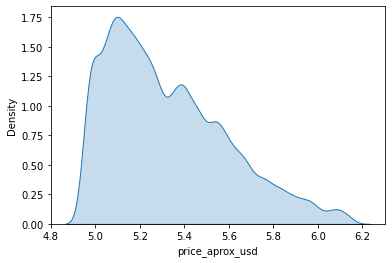

In [379]:
# vemos que forma toma la distribución
sns.kdeplot((np.log10(data.price_aprox_usd)), shade=True,)

**3 - SUPERFICIE**

In [380]:
data.surface_total_in_m2.describe()

count     81892.000000
mean        233.795328
std        1782.222147
min           0.000000
25%          50.000000
50%          84.000000
75%         200.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

In [381]:
#Vemos valores puntuales, 
#data.loc[(data.surface_total_in_m2 > 6000),("price_aprox_usd","surface_total_in_m2","property_type","state_name","place_name","description")]

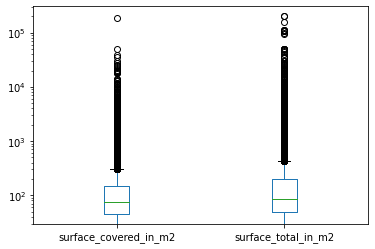

In [382]:
data[['surface_covered_in_m2','surface_total_in_m2']].plot(kind = 'box', logy = True)
plt.show()

In [383]:
#vemos que valores obtenemos usando +-3 sigma de la media para 
Limite_superior_2 = data['surface_total_in_m2'].mean() + (3*data['surface_total_in_m2'].std())
print("Limite_superior_2:",Limite_superior_2)
Limite_inferior_2 = (data['surface_total_in_m2'].mean() - (3*data['surface_total_in_m2'].std()))
print("Limite_inferior_2", Limite_inferior_2)

Limite_superior_2: 5580.461769008914
Limite_inferior_2 -5112.871113022982


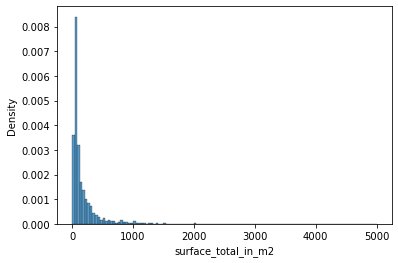

In [384]:
sns.histplot(data.surface_total_in_m2, kde = False, stat = 'density', binrange=(0,5000), bins = 120, line_kws={'linewidth':5});

In [385]:
limite_inferior_surface_total_in_m2 = 30
limite_superior_surface_total_in_m2 = Limite_superior_2
outliers_surface_total_in_m2 = data.loc[(data['surface_total_in_m2'] > limite_superior_surface_total_in_m2)| (data['surface_total_in_m2'] < limite_inferior_surface_total_in_m2),"surface_total_in_m2"]
len(outliers_surface_total_in_m2)

2450

In [386]:
#Vamos a cambiar los outliers por valores nulos
data.loc[(data['surface_total_in_m2'] > limite_superior_surface_total_in_m2)| (data['surface_total_in_m2'] < limite_inferior_surface_total_in_m2),"surface_total_in_m2"]=np.nan
data["surface_total_in_m2"].isnull().sum()

41778

In [387]:
data.surface_total_in_m2.describe()

count    79442.000000
mean       194.223811
std        329.114080
min         30.000000
25%         52.000000
50%         86.000000
75%        202.000000
max       5570.000000
Name: surface_total_in_m2, dtype: float64

In [388]:
#Realizamos el mismo procedimiento con surface_covered_in_m2

In [389]:
data.surface_covered_in_m2.describe()

count    101313.000000
mean        133.050181
std         724.351479
min           0.000000
25%          45.000000
50%          75.000000
75%         150.000000
max      187000.000000
Name: surface_covered_in_m2, dtype: float64

In [390]:
#vemos que valores obtenemos usando +-3 sigma de la media
Limite_superior_3 = data['surface_covered_in_m2'].mean() + (3*data['surface_covered_in_m2'].std())
print("Limite_superior_3:",Limite_superior_3)
Limite_inferior_3 = (data['surface_covered_in_m2'].mean() - (3*data['surface_covered_in_m2'].std()))
print("Limite_inferior_3", Limite_inferior_3)
#vemos que hay datos muy sucios en esta colúmna

Limite_superior_3: 2306.104617600252
Limite_inferior_3 -2040.0042553565124


In [391]:
limite_inferior_surface_covered_in_m2 = 30
limite_superior_surface_covered_in_m2 = 2306
outliers_surface_covered_in_m2 = data.loc[(data['surface_covered_in_m2'] > limite_superior_surface_covered_in_m2)| (data['surface_covered_in_m2'] < limite_inferior_surface_covered_in_m2),"surface_total_in_m2"]
len(outliers_surface_covered_in_m2)

5147

In [392]:
#Vamos a cambiar los outliers por valores nulos
data.loc[(data['surface_covered_in_m2'] > limite_superior_surface_covered_in_m2)| (data['surface_covered_in_m2'] < limite_inferior_surface_covered_in_m2),"surface_covered_in_m2"]=np.nan
data["surface_covered_in_m2"].isnull().sum()

25054

In [393]:
data.surface_covered_in_m2.describe()

count    96166.000000
mean       124.942849
std        129.667055
min         30.000000
25%         48.000000
50%         79.000000
75%        157.000000
max       2300.000000
Name: surface_covered_in_m2, dtype: float64

In [394]:
#Ahora vamos a buscar aquellos casos donde la superficie cubierta sea mayor a la superficie total 
#(claramente son errores de ingresos de datos)

data.loc[data['surface_covered_in_m2']>data['surface_total_in_m2'],['surface_total_in_m2','surface_covered_in_m2']]

surface_total_in_m2  surface_covered_in_m2
177                   420.0                  450.0
316                   125.0                  156.0
317                   125.0                  156.0
455                   170.0                  430.0
668                   180.0                  230.0
...                     ...                    ...
119846                110.0                  140.0
120168                120.0                  140.0
120181                153.0                  226.0
120202                 70.0                  200.0
121055                 77.0                   98.0

[1018 rows x 2 columns]

In [395]:
#Vamos a proceder a intercambiar la posición de los mismos.

# Armamos un dataframe con los casos que necesitamos reemplazar
metros_df = data.loc[data['surface_covered_in_m2']>data['surface_total_in_m2'],['surface_total_in_m2']]
#Cambiamos el nombre de la columna para realizar el update
metros_df.columns = ['surface_covered_in_m2']
#Hacemos el update en los casos que necesitamos
data.update(metros_df)


In [396]:
#Chequeamos que el update haya funcionado como queriamos, volviendo a filtrar el df original ---> YA NO HAY MÁS CASOS DONDE LA SUPERFICIE CUBIERTA > TOTAL
data.loc[data['surface_covered_in_m2']>data['surface_total_in_m2'],['surface_total_in_m2','surface_covered_in_m2']]

Empty DataFrame
Columns: [surface_total_in_m2, surface_covered_in_m2]
Index: []

In [397]:
#Si alguna de las columnas (superficie total) o (superficie cubierta) tiene algún valor, lo vamos a completar con el otro dato que si existe.
data.loc[(data['surface_covered_in_m2'].isnull())|(data['surface_total_in_m2'].isnull()), ['surface_covered_in_m2','surface_total_in_m2']]

surface_covered_in_m2  surface_total_in_m2
1                         NaN                  NaN
3                         NaN                  NaN
5                         NaN                 53.0
9                         NaN                  NaN
10                        NaN               1514.0
...                       ...                  ...
121206                    NaN                 50.0
121207                  178.0                  NaN
121208                  178.0                  NaN
121209                    NaN                157.0
121210                  120.0                  NaN

[50081 rows x 2 columns]

In [398]:
#Completamos los nulos con el otro dato con valor
data['surface_covered_in_m2'] = data['surface_covered_in_m2'].fillna(data['surface_total_in_m2'])
data['surface_total_in_m2'] = data['surface_total_in_m2'].fillna(data['surface_covered_in_m2'])

In [399]:
#chequeamos que solo queden los casos Nulos (NaN) ---> 16.751 casos ahora (antes eran 39.328)
data.loc[(data['surface_covered_in_m2'].isnull())|(data['surface_total_in_m2'].isnull()), ['surface_covered_in_m2','surface_total_in_m2']]

surface_covered_in_m2  surface_total_in_m2
1                         NaN                  NaN
3                         NaN                  NaN
9                         NaN                  NaN
11                        NaN                  NaN
65                        NaN                  NaN
...                       ...                  ...
121121                    NaN                  NaN
121130                    NaN                  NaN
121133                    NaN                  NaN
121134                    NaN                  NaN
121144                    NaN                  NaN

[16751 rows x 2 columns]

In [400]:
#vemos que % de nulos quedaron en la columna superficie total en metros cuadrados 
((data.surface_total_in_m2.isnull().sum() *100)/ data.shape[0]).round()

14.0

In [401]:
data.surface_total_in_m2.describe()

count    104469.000000
mean        179.760771
std         295.361675
min          30.000000
25%          52.000000
50%          87.000000
75%         198.000000
max        5570.000000
Name: surface_total_in_m2, dtype: float64

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='Density'>

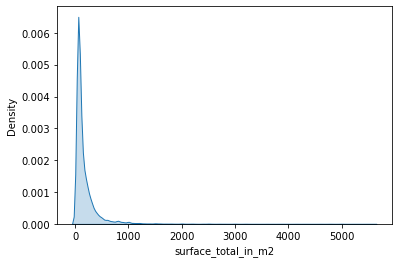

In [402]:
#vemos que forma toma la distribución
sns.kdeplot(data["surface_total_in_m2"], shade=True)

**4 - TIPO DE PROPIEDAD**

En el caso de tipo de propiedad no hay que hacer ningún cambio, porque en todos los campos la información está completa. 

**2.A - PRECIO POR METRO CUADRADO (*)**
Para poder hacer  un tratamiento adecuado de la información de precio x metros cuadrados, primero tenemos que haber hecho un tratamiento adecuado de los siguientes atributos:

- Precio Total
- Superficie Total
- Tipo de Propiedad
- Lugar geográfico (state_name & place_name)

A continuación explicamos un poco mejor a que se debe la necesidad de primero tener preparados adecuadamente esos campos.

In [403]:
#creamos una nueva columna de precio por metro cuadrado en USD que la obtenemos de dividir el precio total en dolares 
#por la superficie total 
data["price_m2_usd_nueva"] = data['price_aprox_usd']/data['surface_total_in_m2']
data.loc[:,["price_m2_usd_nueva","price_usd_per_m2"]].head()

price_m2_usd_nueva  price_usd_per_m2
0                 NaN       1127.272727
1                 NaN               NaN
2                 NaN       1309.090909
3                 NaN               NaN
4                 NaN       1828.571429

In [404]:
#vemos en cuanto queda el % de nulos 
((data.price_m2_usd_nueva.isnull().sum()/data.shape[0])*100).round()

43.0

In [405]:
#Comparamos con los valores de la variable original del dataset 
data["price_m2_usd_nueva"].describe()

count    68569.000000
mean      2221.042943
std       2385.239321
min         22.500000
25%       1250.000000
50%       1900.000000
75%       2591.678276
max      37096.774194
Name: price_m2_usd_nueva, dtype: float64

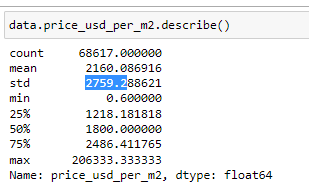


In [406]:
#Vamos completar los valores de este campo, asignando la mediana de price_m2_usd_nueva agrupando por  property_type, state_name y place_name

In [407]:
data_grouped = data.groupby(["property_type","state_name","place_name",])

In [408]:
#Usamos transform para completar los valores nulos con la mediana por grupo

In [409]:
price_m2_usd_nueva_filled = data_grouped["price_m2_usd_nueva"].transform(lambda x: x.fillna(x.median()))
price_m2_usd_nueva_filled

C:\Users\Ribeiro\anaconda3\envs\dhdsblend2021\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning:

Mean of empty slice



0         1461.009174
1         1864.406780
2         1916.666667
3         1583.333333
4         1976.250000
             ...     
121215    7699.115044
121216    1383.333333
121217    2858.695652
121218    1997.916667
121219    1675.324675
Name: price_m2_usd_nueva, Length: 121220, dtype: float64

In [410]:
#vemos la cantidad de casos que representan
price_m2_usd_nueva_filled.isnull().sum()

1647

In [411]:
#vemos que porcentaje de nulos tenemos luego 
print((price_m2_usd_nueva_filled.isnull().sum()*100/data.shape[0]).round())

1.0


In [412]:
#agregamos la nueva colúmna al dataset
data["price_m2_usd_nueva_filled"] = price_m2_usd_nueva_filled

In [413]:
data.price_m2_usd_nueva_filled.describe()

count    119573.000000
mean       2060.226458
std        2028.103585
min          22.500000
25%        1250.000000
50%        1860.489796
75%        2330.839762
max       37096.774194
Name: price_m2_usd_nueva_filled, dtype: float64

**5 - HABITACIONES**

In [414]:
#Primero vamos a verificar la cantidad de filas que tienen el campo "rooms"en blanco
data.rooms.isnull().value_counts()

True     73830
False    47390
Name: rooms, dtype: int64

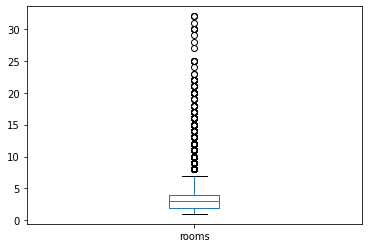

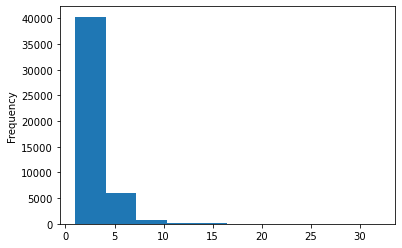

In [415]:
#Segundo vamos a ver cuantos casos de "rooms" con diferentes números existen
data['rooms'].plot(kind = 'box')
plt.show()

data['rooms'].plot(kind = 'hist')
plt.show()

In [416]:
import re
#Creamos una regex  para la palabra "amb" y la corremos en título y en descripcíon para ver que encuentra
pat_ambientes = r'\b(\d{1,2})\s*amb'

#Extraemos los datos las nuevas columnas amb_tit y amb_desc del título y la descripcion
data['amb_tit'] = data.title.str.extract(pat_ambientes, re.IGNORECASE, expand=True).astype(np.float)
data['amb_desc'] = data.description.str.extract(pat_ambientes, re.IGNORECASE, expand=True).astype(np.float)


#Verificamos los valores extraídos
print ("Cantidad de ambientes extraídos de títulos:")
display (data.loc[~(data.amb_tit.isnull())].filter(['amb_tit']).sort_values('amb_tit').amb_tit.unique())
print ("Cantidad de ambientes extraídos de descripciones:")
display (data.loc[~(data.amb_desc.isnull())].filter(['amb_desc']).sort_values('amb_desc').amb_desc.unique())

#Tras revisar los resultados, optamos por no tomar ninguno de los datos extraidos dado que el volumen de datos que extraemos no es significativo

Cantidad de ambientes extraídos de títulos:


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 14.,
       15.])

Cantidad de ambientes extraídos de descripciones:


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       14., 16., 17., 18., 20., 22., 23., 24., 25., 28., 32., 36., 37.,
       50., 53., 65., 70., 75., 84., 90.])

In [417]:
#Creamos una regex  y la corremos en título y en descripción para ver que encuentra
pat_dormitorios = r'\b(\d{1,2})\s*dor'

#Extraemos los datos a las nuevas columnas dor_tit y dor_desc del título y la descripcion
data['dor_tit'] = data.title.str.extract(pat_dormitorios, re.IGNORECASE, expand=True).astype(np.float)
data['dor_desc'] = data.description.str.extract(pat_dormitorios, re.IGNORECASE, expand=True).astype(np.float)

#Verificamos los valores extraídos
print ("Cantidad de dormitorios extraídos de títulos:")
display (data.loc[~(data.dor_tit.isnull())].filter(['dor_tit']).sort_values('dor_tit').dor_tit.unique())
print ("Cantidad de dormitorios extraídos de descripciones:")
display (data.loc[~(data.dor_desc.isnull())].filter(['dor_desc']).sort_values('dor_desc').dor_desc.unique())

#Vemos que extrajo valores que probablemente no esten relacionados con la cantidad de habitaciones 

Cantidad de dormitorios extraídos de títulos:


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.])

Cantidad de dormitorios extraídos de descripciones:


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 13.,
       14., 15., 18., 20., 22., 24., 25., 27., 30., 31., 32., 33., 34.,
       35., 40., 41., 42., 43., 44., 45., 48., 50., 51., 52., 53., 54.,
       57., 60., 62., 65., 70., 72., 74., 75., 76., 77., 78., 80., 83.,
       84., 85., 87., 90., 93., 95.])

**6 - DESCRIPCIÓN Y TÍTULO**

Lo que vamos a hacer es a partir de la columna "Description" y/o "Title" crear las siguientes columnas para agregar un valor a la base de datos:

6.1 - Pileta (Si/NO) Dato Booleano

6.2 - Cochera (Si/No) Dato Booleano

6.3 - A estrenar (Si/No) Dato Booleano


In [418]:
# Cada uno de estos for crea una nueva columna, parking, piscina, y a_estrenar, que devuelve True o False en caso que 
# la fila en la columna description contenga los strings indicados.

for parking_test in ["cochera | estacionamiento | garage"]:
    data["parking"] = data.description.str.contains(parking_test)
for piscina_test in ["piscina | pileta"]:
    data["piscina"] = data.description.str.contains(piscina_test)
for estrenar_test in ["estreno | estrenar | nuevo"]:
    data["a_estrenar"] = data.description.str.contains(estrenar_test)

data.head(1)

Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   

                 place_with_parent_names country_name       state_name  \
0  |Argentina|Capital Federal|Mataderos|    Argentina  Capital Federal   

   geonames_id                  lat-lon      lat  ...  \
0    3430787.0  -34.6618237,-58.5088387 -34.6618  ...   

                                     image_thumbnail  price_m2_usd_nueva  \
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...                 NaN   

  price_m2_usd_nueva_filled  amb_tit  amb_desc  dor_tit  dor_desc  parking  \
0               1461.009174      2.0       2.0      NaN       NaN    False   

   piscina  a_estrenar  
0    False       False  

[1 rows x 35 columns]

In [419]:
# Revisamos el resultado del código.

print("parking", data.parking.value_counts())
print("piscina", data.piscina.value_counts())
print("a_estrenar", data.a_estrenar.value_counts())

parking False    105150
True      16068
Name: parking, dtype: int64
piscina False    104967
True      16251
Name: piscina, dtype: int64
a_estrenar False    112659
True       8559
Name: a_estrenar, dtype: int64


In [420]:
# Pasamos ahora a preparar lo necesario para construir un gráfico que calcule el porcentaje para cada caso

parking_percentage = data.parking.value_counts() / len(data)
piscina_percentage = data.piscina.value_counts() / len(data)
a_estrenar_percentage = data.a_estrenar.value_counts() / len(data)

parking_values = [parking_percentage.values.tolist()]
piscina_values = [piscina_percentage.values.tolist()]
a_estrenar_values = [a_estrenar_percentage.values.tolist()]

In [421]:
falsos = [parking_percentage.loc[parking_percentage.index is False], 
          piscina_percentage.loc[piscina_percentage.index is False], 
          a_estrenar_percentage.loc[a_estrenar_percentage.index is False]]
falsos

[0.8674311169773965, 0.8659214651047682, 0.929376340537865]

In [422]:
verdaderos = [parking_percentage.loc[parking_percentage.index is not False], 
          piscina_percentage.loc[piscina_percentage.index is not False], 
          a_estrenar_percentage.loc[a_estrenar_percentage.index is not False]]
verdaderos

[0.1325523840950338, 0.1340620359676621, 0.07060716053456526]

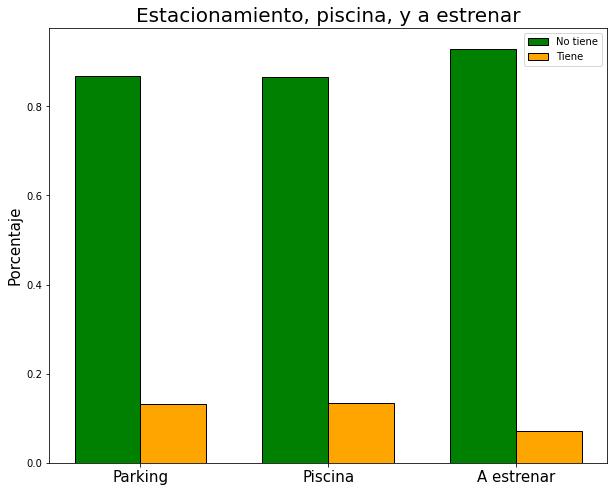

In [423]:
# Graficamos

plt.figure(figsize=(10,8))

x = np.arange(3)  
width = 0.35 

plt.bar(x, falsos,
        width,
        color='green',
        label= "No tiene",
       edgecolor="black",
       linewidth=1)

plt.bar(x+0.35, 
        verdaderos,
        width,
        color='orange',
        label= "Tiene",
       edgecolor="black",
       linewidth=1)

plt.xticks(x+0.175, ['Parking', 'Piscina', 'A estrenar'],fontsize=15)
plt.ylabel("Porcentaje",size=15)
plt.legend(["No tiene", "Tiene"],fontsize=10)
plt.title("Estacionamiento, piscina, y a estrenar",size=20)
plt.show()



```
# This is formatted as code
```

**7 - OTROS CAMPOS**

**8 - Estudiamos la presencia de piscina, cochera o si es a estrenar** 

**9 - Discretizamos la variable precio para estudiar la distribución del rango de precio de las propiedades** 

In [424]:
data_chart = data[data['price_aprox_usd'].notnull()]
data_chart.head(1)

Unnamed: 0 operation property_type place_name  \
1           1      sell     apartment   La Plata   

                       place_with_parent_names country_name  \
1  |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   

               state_name  geonames_id                  lat-lon      lat  ...  \
1  Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295 -34.9039  ...   

                                     image_thumbnail  price_m2_usd_nueva  \
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...                 NaN   

  price_m2_usd_nueva_filled  amb_tit  amb_desc  dor_tit  dor_desc  parking  \
1                1864.40678      NaN       NaN      2.0       NaN     True   

   piscina  a_estrenar  
1    False       False  

[1 rows x 35 columns]

In [425]:
# Creo la columna de precios

data_chart['rango_precios'] = np.where(data_chart['price_aprox_usd']<50000, '1. Hasta 50.000',
                   np.where(data_chart['price_aprox_usd']<100000, '2. Entre 50.000 y 100.000',
                   np.where(data_chart['price_aprox_usd']<150000, '3. Entre 100.000 y 150.000',
                   np.where(data_chart['price_aprox_usd']<200000, '4. Entre 150.000 y 200.000',
                   np.where(data_chart['price_aprox_usd']<250000, '5. Entre 200.000 y 250.000',
                   np.where(data_chart['price_aprox_usd']<300000, '6. Entre 250.000 y 300.000', '7. Mayor a 300.000'))))))

C:\Users\Ribeiro\AppData\Local\Temp\ipykernel_11812\2885350239.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [426]:
rango_precios = data_chart.rango_precios.value_counts()
rango_precios_keys = (rango_precios.index).tolist()
rango_precios_values = (rango_precios.values).tolist()
rango_precios

3. Entre 100.000 y 150.000    20886
7. Mayor a 300.000            20067
4. Entre 150.000 y 200.000    13323
5. Entre 200.000 y 250.000     7753
6. Entre 250.000 y 300.000     6626
2. Entre 50.000 y 100.000      5798
Name: rango_precios, dtype: int64

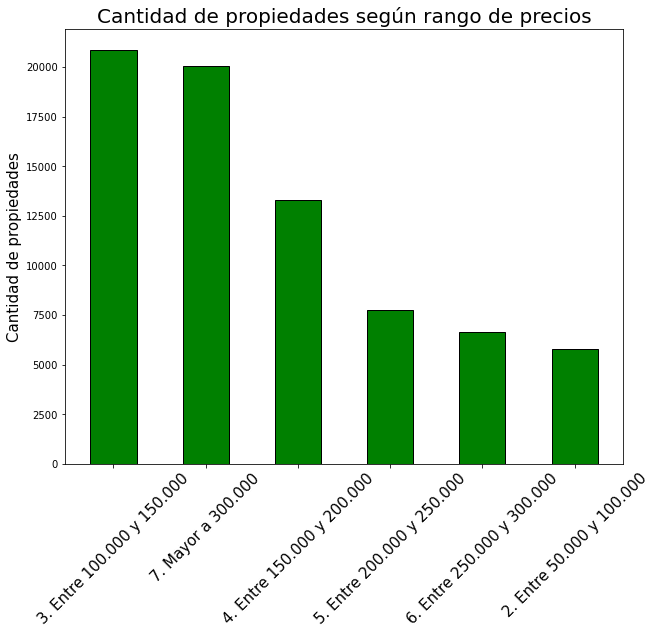

In [427]:
fig = plt.figure(figsize = (10, 8))
 
plt.bar(rango_precios_keys, rango_precios_values, 
        color ='green', 
        width = 0.5,
       edgecolor="black",
        linewidth=1)

plt.xticks(fontsize=15,rotation=45)
plt.ylabel("Cantidad de propiedades",size=15)
plt.title("Cantidad de propiedades según rango de precios",size=20)
plt.show()

In [428]:
#Analizamos diferentes subgrupos con la finalidad de evaluar si los datos son adecuados para el modelo de regresión lineal 

In [429]:
#probamos con Córdoba
data_cba = data.loc[(data.state_name == "Córdoba" )]
data_cba_apartment = data_cba.loc[(data_cba.property_type== 'apartment'), 'price_m2_usd_nueva_filled']
data_cba_apartment.value_counts()

1686.695522    4551
1648.947433     197
1495.564667     178
1397.968051      28
1340.206186      27
               ... 
1489.037571       1
1617.798308       1
1386.138614       1
1640.022576       1
611.111111        1
Name: price_m2_usd_nueva_filled, Length: 1248, dtype: int64

In [430]:
data_cba= data.loc[(data.place_name == "Córdoba" )]
data_cba_house = data_cba.loc[(data_cba.property_type== 'house'), 'price_m2_usd_nueva_filled']
df_cba_house= pd.DataFrame(data_cba_house)
df_cba_house.value_counts()

price_m2_usd_nueva_filled
993.377483                   1336
1000.000000                    27
630.000000                     17
1200.000000                    11
1111.111111                     9
                             ... 
1096.372556                     1
1096.000000                     1
1093.631600                     1
1091.954023                     1
48.071721                       1
Length: 864, dtype: int64

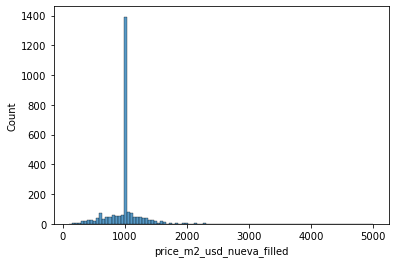

In [431]:
sns.histplot(df_cba_house.price_m2_usd_nueva_filled, kde = False, stat = 'count', 
             binrange=(100,5000), bins = 100,
             line_kws={'linewidth':5});

In [432]:
#Bs.As. G.B.A. Zona Norte

data_zn= data.loc[(data.state_name == "Bs.As. G.B.A. Zona Norte" )]
data_zn.value_counts()
data_zn_apartment = data_zn.loc[(data_zn.property_type == 'apartment'), ('price_m2_usd_nueva_filled','amb_tit','amb_desc','dor_tit','dor_desc','parking','piscina','a_estrenar')]
df_zn_apartment=pd.DataFrame(data_zn_apartment)
df_zn_apartment.head()

price_m2_usd_nueva_filled  amb_tit  amb_desc  dor_tit  dor_desc parking  \
12                2948.717949      2.0       2.0      NaN      30.0   False   
17                1789.772727      3.0       3.0      NaN       NaN   False   
23                1875.000000      NaN       NaN      NaN       1.0   False   
33                1747.311828      3.0       3.0      NaN       NaN   False   
40                 869.565217      3.0       3.0      NaN       2.0   False   

   piscina a_estrenar  
12   False      False  
17   False      False  
23    True      False  
33   False      False  
40    True      False

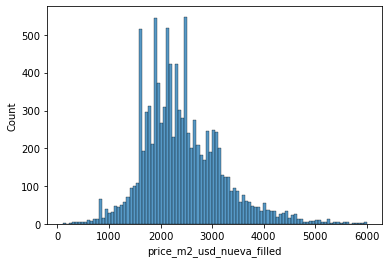

In [433]:
sns.histplot(df_zn_apartment.price_m2_usd_nueva_filled, kde = False, stat = 'count', 
             binrange=(100,6000), bins = 100,
             line_kws={'linewidth':5});

In [434]:
data_zn = data.loc[(data.state_name == "Bs.As. G.B.A. Zona Norte") & (data.property_type=="apartment")]
data_zn.head(5)

Unnamed: 0 operation property_type      place_name  \
12          12      sell     apartment        Martínez   
17          17      sell     apartment  Barrio El Golf   
23          23      sell     apartment           Pilar   
33          33      sell     apartment  Barrio El Golf   
40          40      sell     apartment        Del Viso   

                              place_with_parent_names country_name  \
12  |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...    Argentina   
17  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...    Argentina   
23   |Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|    Argentina   
33  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...    Argentina   
40  |Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Del ...    Argentina   

                  state_name  geonames_id                        lat-lon  \
12  Bs.As. G.B.A. Zona Norte    3430813.0        -34.4860195,-58.5038139   
17  Bs.As. G.B.A. Zona Norte          NaN  -34.4087174767,-58.6343892841   
23  Bs.As. G.B.A. Zona Norte          NaN                            NaN   
33  Bs.As. G.B.A. Zona Norte          NaN  -34.4087174767,-58.6343892841   
40  Bs.As. G.B.A. Zona Norte    3435087.0  -34.4447426129,-58.7952483187   

        lat  ...                                    image_thumbnail  \
12  -34.486  ...  https://thumbs4.properati.com/6/wgSui4rTYqPncO...   
17 -34.4087  ...  https://thumbs4.properati.com/8/txJsOWitsI5tjM...   
23      NaN  ...  https://thumbs4.properati.com/8/BHyv2zmce3bVoU...   
33 -34.4087  ...  https://thumbs4.properati.com/8/ecZrL8hdhlQ4uk...   
40 -34.4447  ...  https://thumbs4.properati.com/3/BGpEX1GZ5Mu5xh...   

    price_m2_usd_nueva price_m2_usd_nueva_filled  amb_tit  amb_desc  dor_tit  \
12         2948.717949               2948.717949      2.0       2.0      NaN   
17         1789.772727               1789.772727      3.0       3.0      NaN   
23                 NaN               1875.000000      NaN       NaN      NaN   
33         1747.311828               1747.311828      3.0       3.0      NaN   
40          869.565217                869.565217      3.0       3.0      NaN   

    dor_desc  parking  piscina  a_estrenar  
12      30.0    False    False       False  
17       NaN    False    False       False  
23       1.0    False     True       False  
33       NaN    False    False       False  
40       2.0    False     True       False  

[5 rows x 35 columns]


Vemos  que porcentaje de nulos tenemos en la columna place name en los valores
'Olivos', 'Martínez', 'San Isidro', 'Vicente López', 'Florida','La Lucila','Acassuso'

en las siguientes columnas:
1) price_usd_per_m2 es la del data ser original

2) price_m2_usd_nueva es la que se obtuvo por dividir:( precio total de la propiedad en usd / superficie total )

3) price_m2_usd_nueva_filled es la que se obtuvo por imputar con la mediana price_m2_usd_nueva agrupando por place_name y property_type

In [435]:
#1)
place_select = ['Olivos', 'Martínez', 'San Isidro', 'Vicente López', 'Florida','La Lucila','Acassuso']
data_null= data.loc[(data.place_name.isin(place_select)) , 'price_usd_per_m2']
print('1)')
print('total',data_null.shape)
print('nulos:', (data_null.isnull().sum()/data_null.shape)*100,'%')

data_null.describe()

1)
total (5537,)
nulos: [32.92396605] %


count    3714.000000
mean     2445.057865
std      1065.634723
min         8.892740
25%      1636.564763
50%      2381.265664
75%      3099.335387
max      9900.000000
Name: price_usd_per_m2, dtype: float64

In [436]:
data_null_2= data.loc[(data.place_name.isin(place_select)) , 'price_m2_usd_nueva']
print('2)')
print('total',data_null_2.shape)
print('nulos:',(data_null_2.isnull().sum()/data_null_2.shape)*100,'%')
data_null_2.describe()

2)
total (5537,)
nulos: [10.04153874] %


count     4981.000000
mean      2472.708513
std       1071.433778
min        200.000000
25%       1686.875000
50%       2385.714286
75%       3074.074074
max      10884.615385
Name: price_m2_usd_nueva, dtype: float64

In [437]:
data_null_3= data.loc[(data.place_name.isin(place_select)) , 'price_m2_usd_nueva_filled']
print('3)')
print('total',data_null_3.shape)
print('nulos:',(data_null_3.isnull().sum()/data_null_3.shape)*100,'%')
data_null_3.describe()

3)
total (5537,)
nulos: [0.] %


count     5537.000000
mean      2455.733373
std       1038.450533
min        200.000000
25%       1666.666667
50%       2386.363636
75%       3066.666667
max      10884.615385
Name: price_m2_usd_nueva_filled, dtype: float64

In [438]:
#Nos quedamos con el grupo 1, por las caracteristicas observadas creemos que es el que mejor va a performar en el modelo de regresión.

**D) Eliminación de registros irrelevantes para el modelo predictivo aplicado al dataset en cuestion.**

In [440]:
#Eliminamos las columnas que no aportan informacion descriptiva al df
data.drop(columns=['Unnamed: 0','operation','place_with_parent_names','country_name','state_name','geonames_id','lat-lon','lat','lon','price','currency','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2'], inplace= True)

<AxesSubplot:>

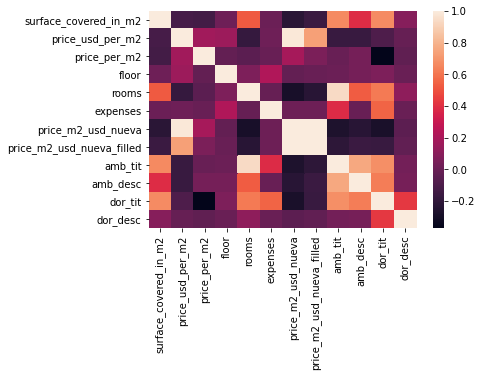

In [441]:
#vemos la correlación de las variables en el dataset procesado
sns.heatmap(data.corr())

In [442]:
#Importamos el data set limpio que vamos a utilizar en el modelo de regresión

In [443]:
data.to_csv('data_2.csv')